In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bicis=pd.read_csv("bicicorunha_data.csv", parse_dates=True)
bicis.drop('Unnamed: 0', axis=1)

,id,name,timestamp,free_bikes,empty_slots,uid,last_updated,slots,normal_bikes,ebikes
0,023efce1bbb332a1b918d56aeb671890,Avenida de Arteixo,2024-12-08T15:42:39.108553Z,8,7,53,1733672393,15,8,0
1,02cecd02915c86d7ab8034b61b19da0e,Mercado de Monte Alto,2024-12-08T15:42:39.108441Z,0,14,43,1733672357,15,0,0
2,030c4027b0bea390e562645c7082db4c,Los Rosales,2024-12-08T15:42:39.108049Z,5,20,11,1733672462,25,3,2
3,0e3aa0134a2f3d07ae5bd093e6af9a33,Plaza de Portugal,2024-12-08T15:42:39.108579Z,7,13,55,1733672439,20,7,0
4,104e0797759d11ac22a61cfed357800b,Ventorrillo,2024-12-08T15:42:39.108261Z,12,7,27,1733672469,19,11,1
...,...,...,...,...,...,...,...,...,...,...
1333824,f04ee4ffca2a6f3daacba88a9eee8487,Millenium,2025-01-15T12:27:51.747659Z,1,14,56,1736943916,15,1,0
1333825,f702a7b2b1631ace3781c405acb99b70,Praza de Ourense,2025-01-15T12:27:51.747406Z,14,0,41,1736944004,15,14,1
1333826,f86954a7b51703f735bce5b549cb4e16,Parque del Agra,2025-01-15T12:27:51.747479Z,6,9,45,1736943932,15,6,0
1333827,fb0d3f40ea7570546b171b43ccd57a2a,Rosales-Labañou,2025-01-15T12:27:51.747496Z,6,9,46,1736944001,15,6,0


In [3]:
bicis_no_dupl=bicis.copy()
bicis_no_dupl.drop('Unnamed: 0', axis=1, inplace=True)
# Convertir 'timestamp' a datetime
bicis_no_dupl['timestamp'] = pd.to_datetime(bicis_no_dupl['timestamp'], format='ISO8601', utc=True)


In [4]:
bicis_dupes = bicis_no_dupl[bicis_no_dupl['name']=='Avenida de Arteixo']['timestamp']
bicis_dupes.head(50)

0      2024-12-08 15:42:39.108553+00:00
49     2024-12-08 15:45:38.315413+00:00
98     2024-12-08 15:45:38.315413+00:00
147    2024-12-08 15:48:38.191186+00:00
196    2024-12-08 15:48:38.191186+00:00
245    2024-12-08 15:51:39.243301+00:00
294    2024-12-08 15:54:39.048762+00:00
343    2024-12-08 15:57:38.185022+00:00
392    2024-12-08 15:57:38.185022+00:00
441    2024-12-08 16:00:39.251869+00:00
490    2024-12-08 16:03:37.829725+00:00
539    2024-12-08 16:03:37.829725+00:00
588    2024-12-08 16:06:38.345369+00:00
637    2024-12-08 16:09:37.913851+00:00
686    2024-12-08 16:09:37.913851+00:00
735    2024-12-08 16:12:38.482455+00:00
784    2024-12-08 16:15:38.500802+00:00
833    2024-12-08 16:15:38.500802+00:00
882    2024-12-08 16:18:39.239661+00:00
931    2024-12-08 16:21:39.997302+00:00
980    2024-12-08 16:21:39.997302+00:00
1029   2024-12-08 16:24:39.443773+00:00
1078   2024-12-08 16:27:39.784173+00:00
1127   2024-12-08 16:27:39.784173+00:00
1176   2024-12-08 16:30:40.357981+00:00


In [5]:
bicis_no_dupl=bicis_no_dupl.drop_duplicates()
bicis_no_dupl.head(50)

,id,name,timestamp,free_bikes,empty_slots,uid,last_updated,slots,normal_bikes,ebikes
0,023efce1bbb332a1b918d56aeb671890,Avenida de Arteixo,2024-12-08 15:42:39.108553+00:00,8,7,53,1733672393,15,8,0
1,02cecd02915c86d7ab8034b61b19da0e,Mercado de Monte Alto,2024-12-08 15:42:39.108441+00:00,0,14,43,1733672357,15,0,0
2,030c4027b0bea390e562645c7082db4c,Los Rosales,2024-12-08 15:42:39.108049+00:00,5,20,11,1733672462,25,3,2
3,0e3aa0134a2f3d07ae5bd093e6af9a33,Plaza de Portugal,2024-12-08 15:42:39.108579+00:00,7,13,55,1733672439,20,7,0
4,104e0797759d11ac22a61cfed357800b,Ventorrillo,2024-12-08 15:42:39.108261+00:00,12,7,27,1733672469,19,11,1
5,10af3b0e504fc241415d4047a58bfb5b,Cd Castrillón,2024-12-08 15:42:39.108208+00:00,1,14,23,1733672349,15,1,0
6,15b6693701eb534cddabc0bdd4c3b8a2,Pablo Picasso,2024-12-08 15:42:39.108232+00:00,11,7,25,1733672482,19,10,1
7,16d30b6bb080c9ceac0ab0ca3b20111a,Barrio de las Flores,2024-12-08 15:42:39.108315+00:00,11,12,31,1733672448,23,11,0
8,18b3d4c21c5cec9d8e25fa0a6cab109a,Torre de Hércules,2024-12-08 15:42:39.107967+00:00,1,14,5,1733672480,15,1,0
9,18e32269ce7f371acf5ca7f016b07a2a,Campo de Marte,2024-12-08 15:42:39.108130+00:00,7,8,17,1733672351,15,5,2


Al borrar eliminados se pasaron de 1333829 filas a 890281 . Se tomaron los datos de la API cada 3 minutos. La API se actualiza em menos de 3 min. Se reduje en un 33,26% aproximadamente.

In [6]:
bicis_cuatro_caminos = bicis_no_dupl[bicis_no_dupl['name'] == 'Cuatro Caminos']
bicis_cuatro_caminos

,id,name,timestamp,free_bikes,empty_slots,uid,last_updated,slots,normal_bikes,ebikes
23,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2024-12-08 15:42:39.108516+00:00,8,14,50,1733672419,23,8,0
72,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2024-12-08 15:45:38.315377+00:00,8,14,50,1733672602,23,8,0
170,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2024-12-08 15:48:38.191141+00:00,8,14,50,1733672786,23,8,0
268,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2024-12-08 15:51:39.243255+00:00,8,14,50,1733672969,23,8,0
317,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2024-12-08 15:54:39.048727+00:00,8,14,50,1733673152,23,8,0
...,...,...,...,...,...,...,...,...,...,...
1333509,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2025-01-15 12:15:53.825277+00:00,0,23,50,1736943271,23,0,0
1333607,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2025-01-15 12:18:53.299762+00:00,0,23,50,1736943454,23,0,0
1333656,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2025-01-15 12:21:53.824584+00:00,0,23,50,1736943637,23,0,0
1333754,7446dcc290f2570a47d4ed2bc9282ceb,Cuatro Caminos,2025-01-15 12:24:51.930125+00:00,0,23,50,1736943820,23,0,0


In [7]:
bicis_cuatro_caminos['timestamp'] = pd.to_datetime(bicis_cuatro_caminos['timestamp'])
bicis_cuatro_caminos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18169 entries, 23 to 1333803
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            18169 non-null  object             
 1   name          18169 non-null  object             
 2   timestamp     18169 non-null  datetime64[ns, UTC]
 3   free_bikes    18169 non-null  int64              
 4   empty_slots   18169 non-null  int64              
 5   uid           18169 non-null  int64              
 6   last_updated  18169 non-null  int64              
 7   slots         18169 non-null  int64              
 8   normal_bikes  18169 non-null  int64              
 9   ebikes        18169 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(7), object(2)
memory usage: 1.5+ MB


/tmp/ipykernel_730/1667605094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicis_cuatro_caminos['timestamp'] = pd.to_datetime(bicis_cuatro_caminos['timestamp'])


<Axes: xlabel='timestamp', ylabel='free_bikes'>

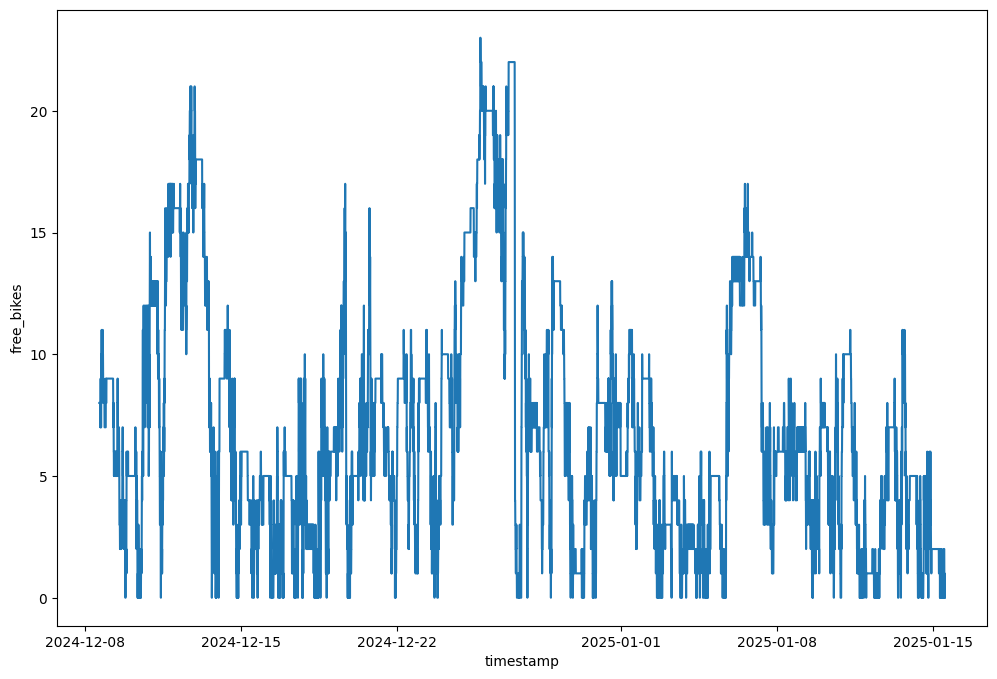

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data=bicis_cuatro_caminos, x='timestamp', y='free_bikes')

In [ ]:
plt.figure(figsize=(20,16))
sns.barplot(data=bicis_no_dupl, x=bicis_no_dupl['free_bikes'], y=bicis_no_dupl['name'][:5000], hue='name')

<Axes: xlabel='timestamp', ylabel='free_bikes'>

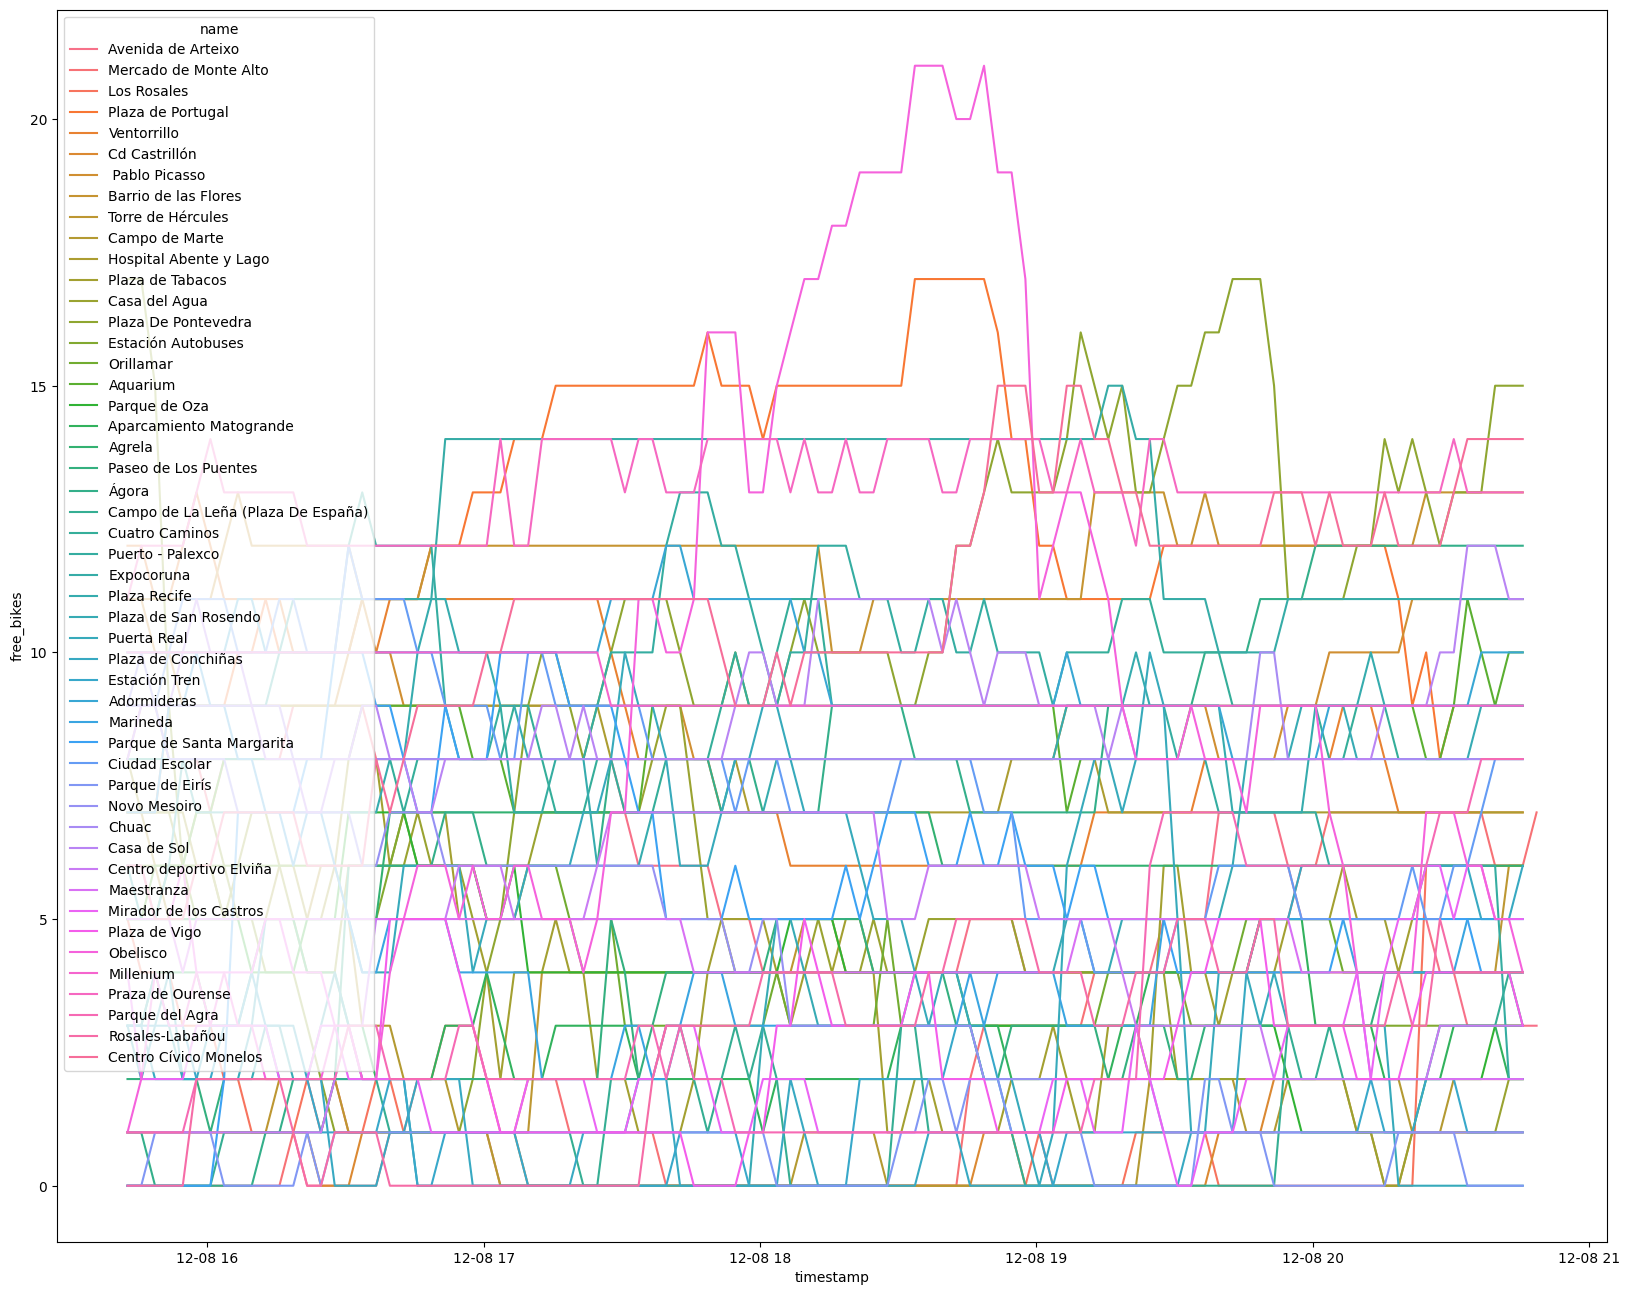

In [44]:
plt.figure(figsize=(20,16))
sns.lineplot(data=bicis_no_dupl, x=bicis_no_dupl['timestamp'][:5000], y=bicis_no_dupl['free_bikes'][:5000], hue='name')

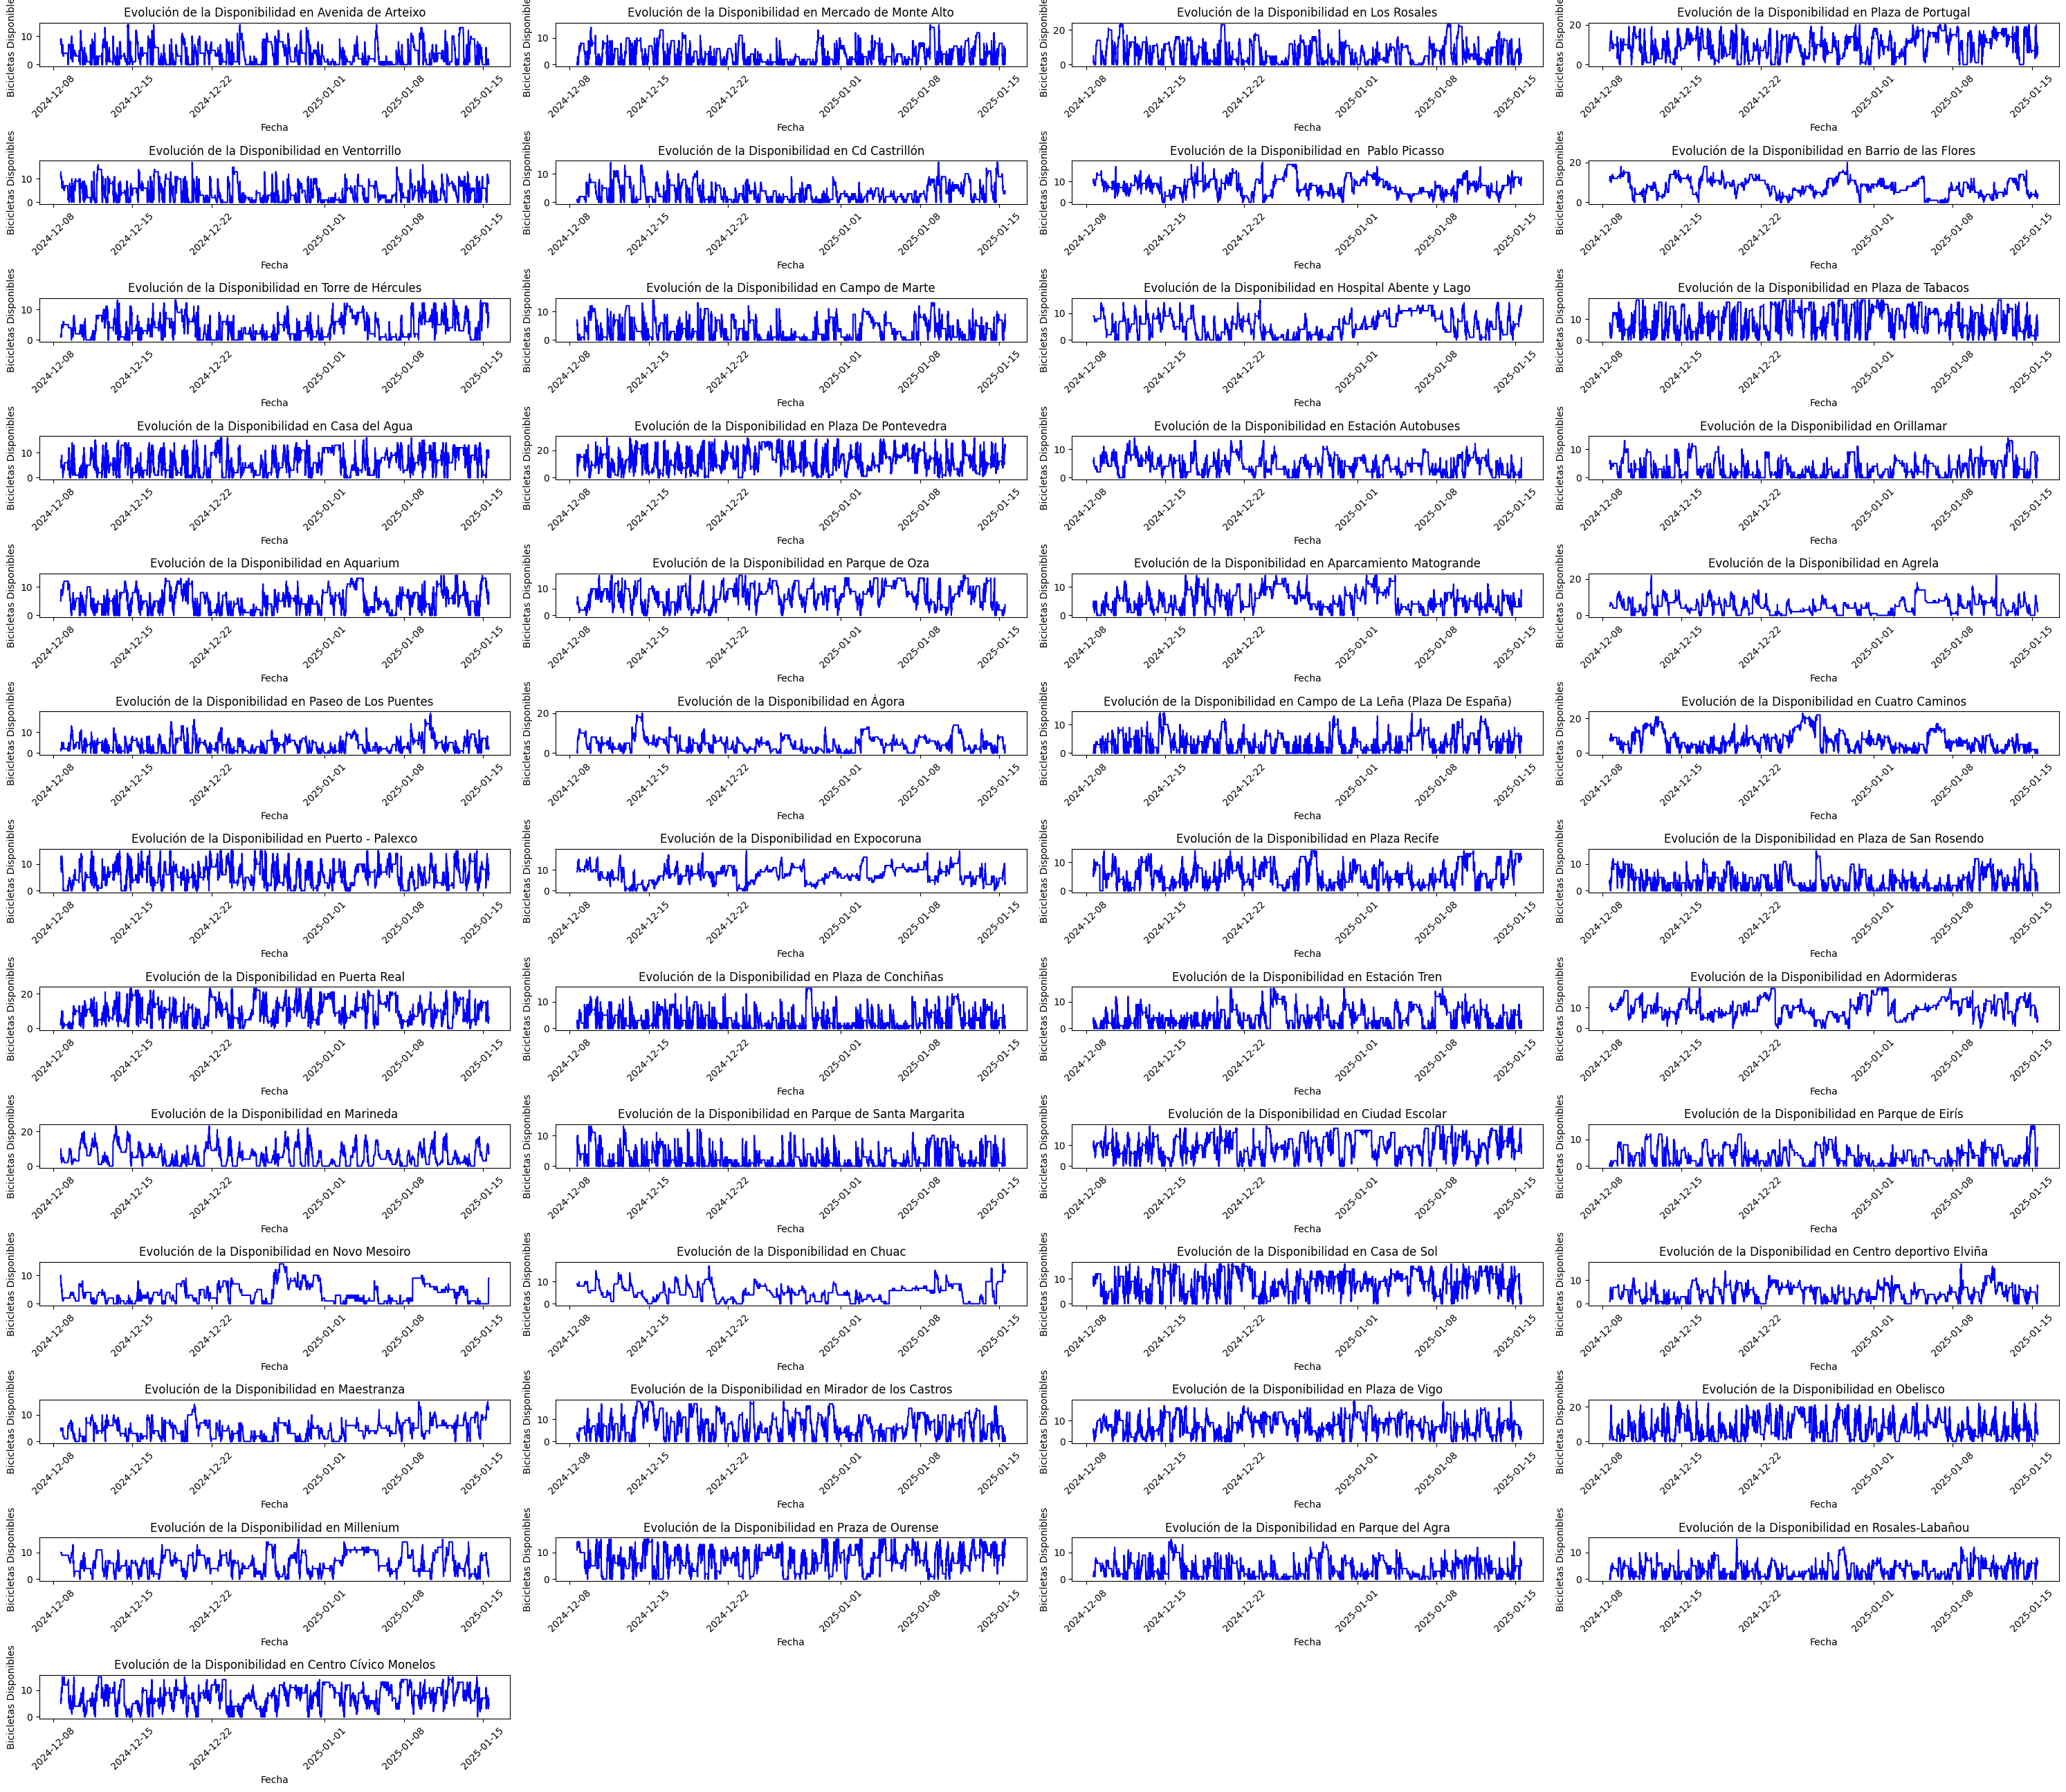

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'timestamp' está en formato datetime
bicis_no_dupl['timestamp'] = pd.to_datetime(bicis_no_dupl['timestamp'])

# Obtener las estaciones únicas
estaciones = bicis_no_dupl['name'].unique()

# Definir el número de filas y columnas para los subgráficos
n_estaciones = len(estaciones)
n_cols = 4  # Número de columnas en el mosaico
n_rows = (n_estaciones // n_cols) + (n_estaciones % n_cols > 0)  # Calcular filas necesarias

# Crear la figura con subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 26))
axes = axes.flatten()  # Aplanar los ejes para iterar más fácilmente

# Graficar la evolución de la disponibilidad de bicicletas para cada estación
for i, estacion in enumerate(estaciones):
    ax = axes[i]
    
    # Filtrar datos para la estación
    estacion_data = bicis_no_dupl[bicis_no_dupl['name'] == estacion]
    
    # Graficar para la estación en su subgráfico correspondiente
    sns.lineplot(data=estacion_data, x='timestamp', y='free_bikes', ax=ax, color='blue')
    
    # Configurar título y etiquetas
    ax.set_title(f'Evolución de la Disponibilidad en {estacion}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Bicicletas Disponibles')
    ax.tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si es necesario
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajustar el layout
plt.tight_layout()
plt.show()


<Axes: xlabel='timestamp', ylabel='free_bikes'>

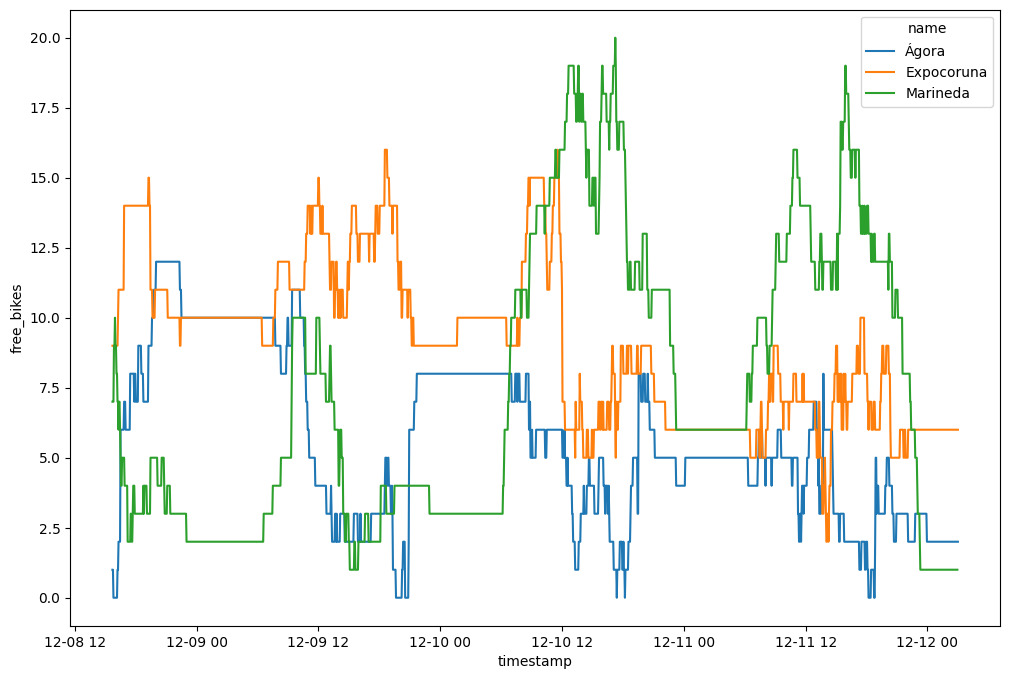

In [66]:
estacions = ['Marineda', 'Expocoruna', 'Ágora']
datos_filtrados = bicis_no_dupl[bicis_no_dupl['name'].isin(estacions)]

plt.figure(figsize=(12,8))
sns.lineplot(data=datos_filtrados, x=datos_filtrados['timestamp'][:5000], y=datos_filtrados['free_bikes'][:5000], hue='name')

4

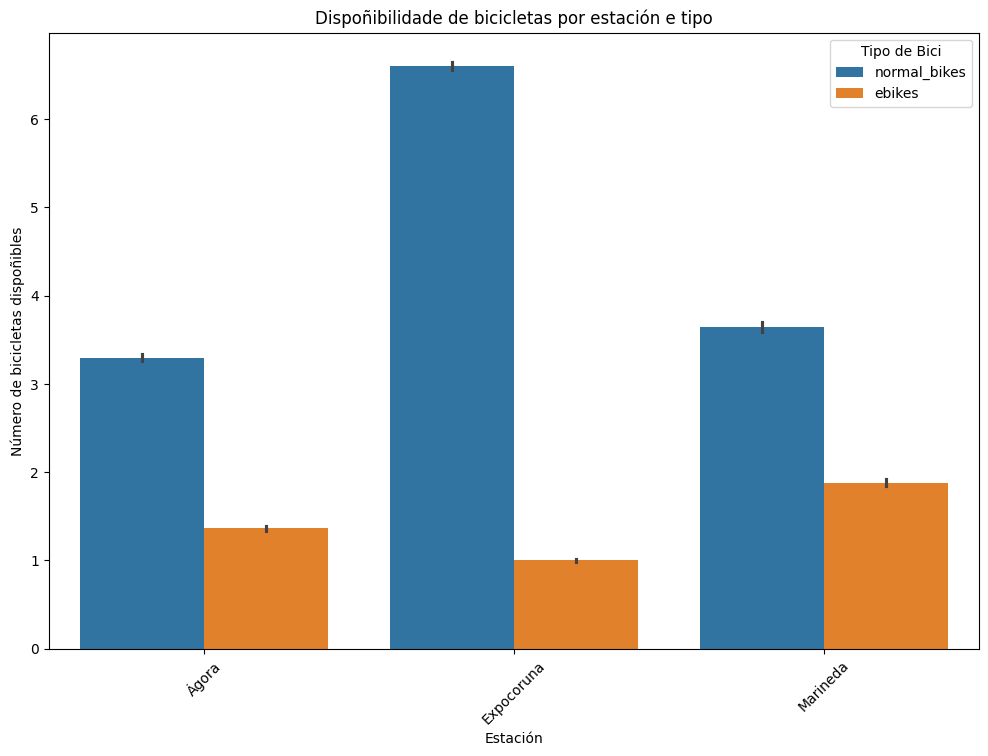

In [31]:
# Convertir os datos ao formato longo (melt)
datos_melted = datos_filtrados.melt(id_vars=['name'], value_vars=['normal_bikes', 'ebikes'], 
                                    var_name='Tipo de Bici', value_name='Número de Bicis')

# Crear a gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=datos_melted, x='name', y='Número de Bicis', hue='Tipo de Bici')

# Configuracións adicionais
plt.xlabel('Estación')
plt.ylabel('Número de bicicletas dispoñibles')
plt.title('Dispoñibilidade de bicicletas por estación e tipo')
plt.legend(title="Tipo de Bici")
plt.xticks(rotation=45)
plt.show()

5

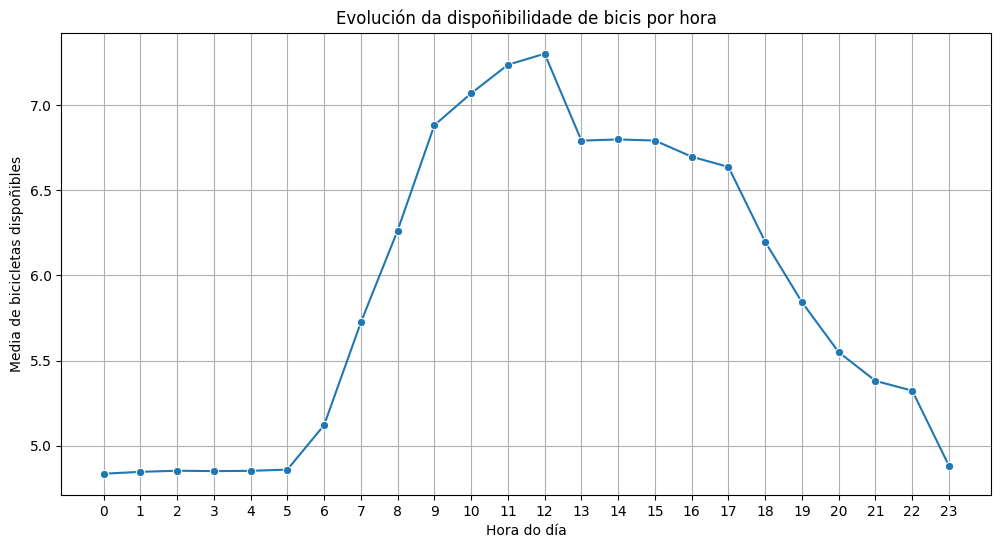

In [43]:
# Filtrar as estacións e crear unha copia explícita
estacions = ['Marineda', 'Expocoruna', 'Ágora']
datos_filtrados = bicis_no_dupl[bicis_no_dupl['name'].isin(estacions)].copy()

# Crear unha columna coa hora do día
datos_filtrados['hora'] = datos_filtrados['timestamp'].dt.hour

# Calcular a media de bicicletas dispoñibles por hora (por exemplo, usando a columna 'num_bikes_available' ou 'free_bikes')
datos_horarios = datos_filtrados.groupby('hora')['free_bikes'].mean().reset_index()

# Crear a gráfica de liñas
plt.figure(figsize=(12, 6))
sns.lineplot(data=datos_horarios, x='hora', y='free_bikes', marker='o', linestyle='-')

plt.xlabel('Hora do día')
plt.ylabel('Media de bicicletas dispoñibles')
plt.title('Evolución da dispoñibilidade de bicis por hora')
plt.xticks(range(24))
plt.grid(True)
plt.show()

        fecha  viajes
0  2024-12-08   729.0
1  2024-12-09  2166.0
2  2024-12-10  2900.0
3  2024-12-11  3045.0
4  2024-12-12  3099.0


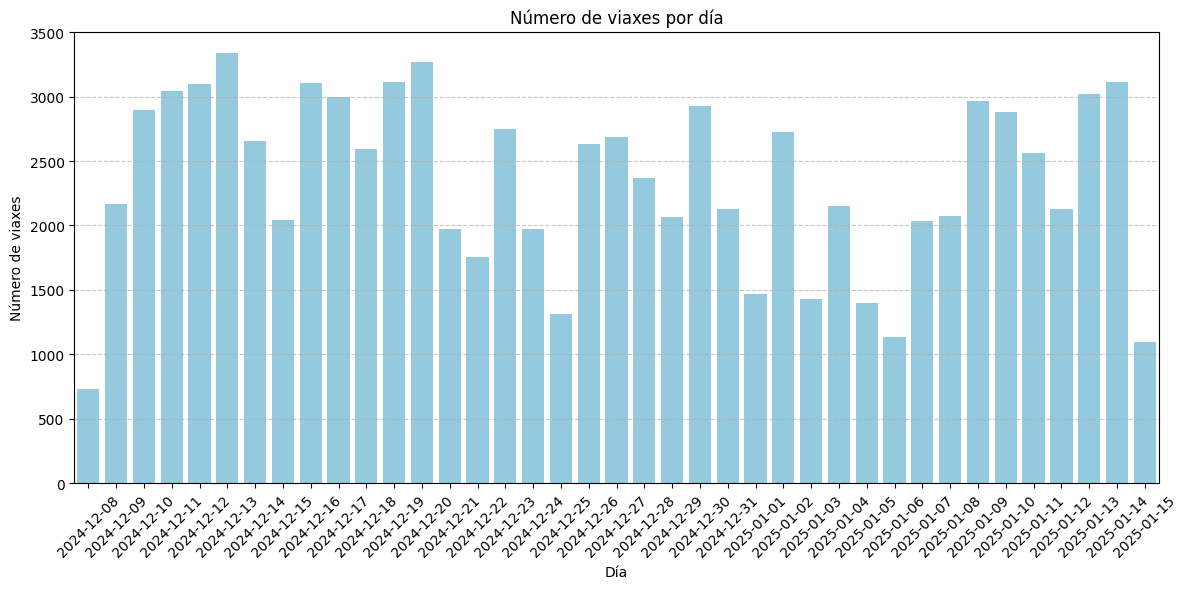

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supoñendo que o DataFrame se chama df
# Ordenamos os datos por estación e timestamp
df = bicis_no_dupl.sort_values(['name', 'timestamp'])

# Calcula a diferenza no número de bicis dispoñibles para cada estación
df['delta'] = df.groupby('name')['free_bikes'].diff()

# Se o delta é negativo, contamos as viaxes como o valor absoluto; en caso contrario, 0.
df['viajes'] = df['delta'].apply(lambda x: -x if pd.notnull(x) and x < 0 else 0)

# Extraer só a data (sen hora) do timestamp para agrupar por día
df['fecha'] = df['timestamp'].dt.date

# Agrupar por día e sumar o número de viaxes
viajes_por_dia = df.groupby('fecha')['viajes'].sum().reset_index()

print(viajes_por_dia.head())

# Visualizar os resultados cun gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=viajes_por_dia, x='fecha', y='viajes', color='skyblue')
plt.xlabel('Día')
plt.ylabel('Número de viaxes')
plt.title('Número de viaxes por día')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


        fecha  trips_normal  trips_ebikes
0  2024-12-08         271.0         475.0
1  2024-12-09         925.0        1318.0
2  2024-12-10        1551.0        1582.0
3  2024-12-11        1674.0        1611.0
4  2024-12-12        1606.0        1761.0


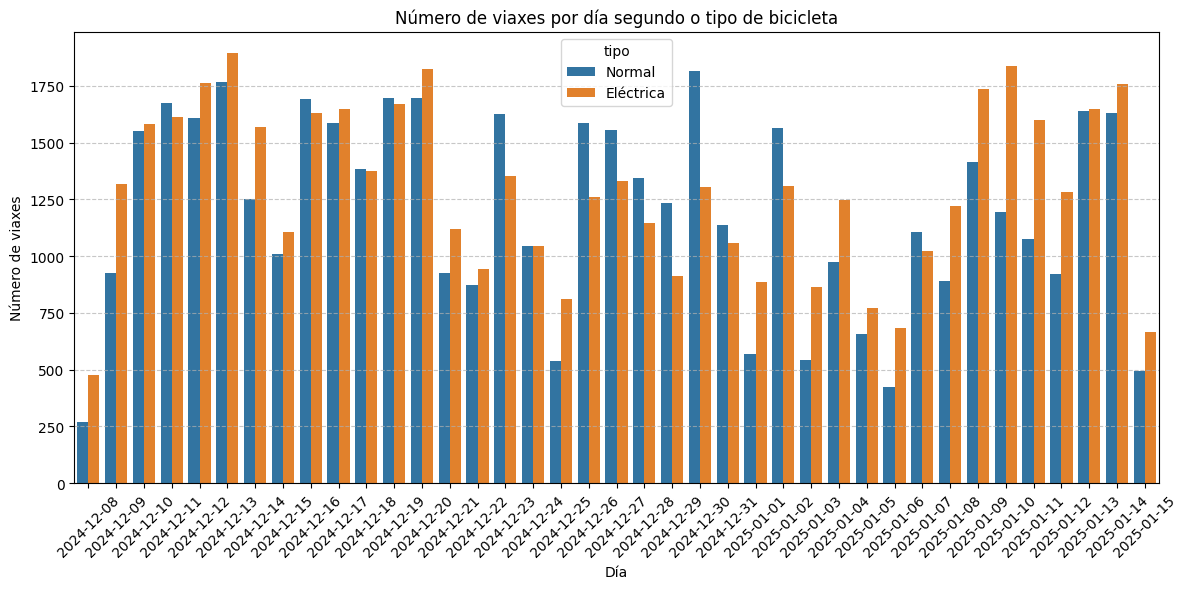

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar os datos por estación e timestamp para que o diff se compute correctamente
df = df.sort_values(['name', 'timestamp'])

# Calcular a diferenza entre rexistros consecutivos para cada estación para bicicletas normais e eléctricas
df['delta_normal'] = df.groupby('name')['normal_bikes'].diff()
df['delta_ebikes'] = df.groupby('name')['ebikes'].diff()

# Contar como viaxe cando o número de bicicletas diminúe:
# Se a diferencia é negativa, a viaxe será o valor absoluto; se non, 0.
df['trips_normal'] = df['delta_normal'].apply(lambda x: -x if pd.notnull(x) and x < 0 else 0)
df['trips_ebikes'] = df['delta_ebikes'].apply(lambda x: -x if pd.notnull(x) and x < 0 else 0)

# Extraer a data (sen hora) a partir do timestamp para agrupar por día
df['fecha'] = df['timestamp'].dt.date

# Agrupar por día e sumar as viaxes para cada tipo
viaxes_por_dia = df.groupby('fecha')[['trips_normal', 'trips_ebikes']].sum().reset_index()
print(viaxes_por_dia.head())

# Convertir os datos a formato longo para facilitar a visualización con hue
viaxes_por_dia_long = viaxes_por_dia.melt(id_vars='fecha', 
                                         value_vars=['trips_normal', 'trips_ebikes'],
                                         var_name='tipo', value_name='viaxes')

# Opcional: cambiar os nomes para que sexan máis claros
viaxes_por_dia_long['tipo'] = viaxes_por_dia_long['tipo'].replace({'trips_normal': 'Normal',
                                                                   'trips_ebikes': 'Eléctrica'})

# Visualizar os resultados cun gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=viaxes_por_dia_long, x='fecha', y='viaxes', hue='tipo')

plt.xlabel('Día')
plt.ylabel('Número de viaxes')
plt.title('Número de viaxes por día segundo o tipo de bicicleta')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Index(['fecha', 'viajes', 'date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow',
       'wdir', 'wspd', 'wpgt', 'pres', 'tsun'],
      dtype='object')


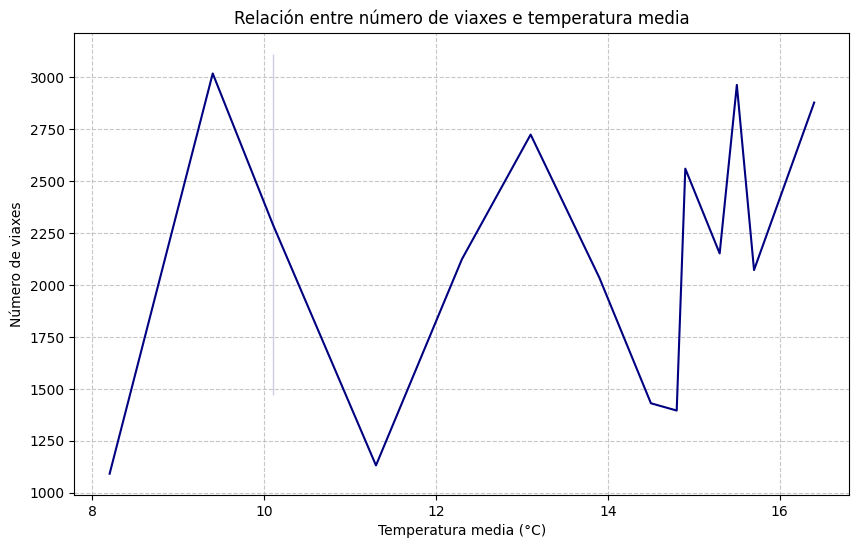

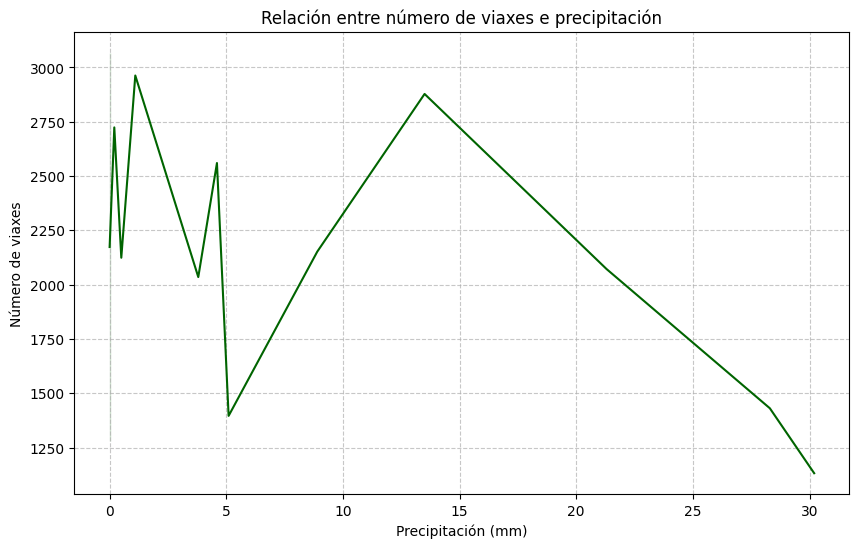

Matriz de correlación:
          viajes      tavg      prcp
viajes  1.000000  0.209615 -0.413102
tavg    0.209615  1.000000  0.346331
prcp   -0.413102  0.346331  1.000000


In [63]:

df['fecha'] = df['timestamp'].dt.date
viaxes_por_dia = df.groupby('fecha')['viajes'].sum().reset_index()
#print(viaxes_por_dia.head())

weather_df = pd.read_csv("tiempo.csv")  # Actualiza o nome do ficheiro se é necesario

# Asegurarse de que a columna de data está no mesmo formato (converténdoa a datetime e extraendo a data):
weather_df['fecha'] = pd.to_datetime(weather_df['date']).dt.date


merged_df = pd.merge(viaxes_por_dia, weather_df, on='fecha', how='inner')
print(merged_df.columns)

#print(merged_df.head())

# --- 4. Visualización da relación viaxes vs. tempo atmosférico ---

# Relación entre viaxes e temperatura media
plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df, x='tavg', y='viajes', color='navy')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Número de viaxes')
plt.title('Relación entre número de viaxes e temperatura media')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Relación entre viaxes e precipitación
plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df, x='prcp', y='viajes', color='darkgreen')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Número de viaxes')
plt.title('Relación entre número de viaxes e precipitación')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()